In [1]:
#Importing all related libraries and add-ins for our classification models
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder


from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
#Importing our data
mushrooms = pd.read_csv("mushrooms.csv")

In [3]:
#First copy the data in case of need, we can go back to the original data
df = mushrooms.copy()

In [4]:
#Looking to the first 5 observations in data
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


First of all, brief Introduction about that dataset should been done. 

Attribute Information: (classes: edible=e, poisonous=p)

cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

bruises: bruises=t,no=f

odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

gill-attachment: attached=a,descending=d,free=f,notched=n

gill-spacing: close=c,crowded=w,distant=d

gill-size: broad=b,narrow=n

gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

stalk-shape: enlarging=e,tapering=t

stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

veil-type: partial=p,universal=u

veil-color: brown=n,orange=o,white=w,yellow=y

ring-number: none=n,one=o,two=t

ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

Since all the names of observations are basically the first or random "letters", it is not useful to interpret that results
in visualizations or analysis. So, it is better to rename the observations to through their correct meanings

In [5]:
df["cap-shape"].replace({"b": "bell", 
                     "c":"conical" ,"x" : "convex","f":"flat","k":"knobbed","s":"sunken"}, inplace=True)


In [6]:
df["cap-surface"].replace({"f":"fibrous","g":"grooves","y":"scaly","s":"smooth"}, inplace=True)


In [7]:
df["class"].replace({"e":"eatable","p":"poisonous"}, inplace=True)

In [8]:
df["cap-color"].replace({"n":"brown","b":"buff","c":"cinnamon","g":"gray",
                     "r":"green","p":"pink","u":"purple","e":"red","w":"white","y":"yellow"}, inplace=True)

In [9]:
df["bruises"].replace({"t":"bruises","f":"no"}, inplace=True)

In [10]:
df["odor"].replace({"a":"almond","l":"anise","c":"creosot","y":"fishy","f":"foul",
                    "m":"musty","n":"none","p":"pungent","s":"spicy"}, inplace=True)

In [11]:
df["gill-attachment"].replace({"a":"attached","d":"descending","f":"free","n":"notched"}, inplace=True)

In [12]:
df["gill-spacing"].replace({ "c":"close","w":"crowded","d":"distant"}, inplace=True)

In [13]:
df["gill-size"].replace({"b":"broad","n":"narrow"}, inplace=True)

In [14]:
df["gill-color"].replace({"k":"black","n":"brown","b":"buff","h":"chocolate","g":"gray", 
                     "r":"green","o":"orange","p":"pink","u":"purple","e":"red","w":"white","y":"yellow"}, inplace=True)

In [15]:
df["stalk-shape"].replace({"e":"enlarging","t":"tapering"}, inplace=True)

In [16]:
df["stalk-root"].replace({"b":"bulbous","c":"club","u":"cup","e":"equal","z":"rhizomorphs","r":"rooted","?":"missing"},
                         inplace=True)

In [17]:
df["stalk-surface-above-ring"].replace({"f":"fibrous","y":"scaly","k":"silky","s":"smooth"}, inplace=True)

In [18]:
df["stalk-surface-below-ring"].replace({"f":"fibrous","y":"scaly","k":"silky","s":"smooth"}, inplace=True)

In [19]:
df["stalk-color-above-ring"].replace({"n":"brown","b":"buff","c":"cinnamon","g":"gray","o":"orange","p":"pink",
                     "e":"red","w":"white","y":"yellow"}, inplace=True)

In [20]:
df["stalk-color-below-ring"].replace({"n":"brown","b":"buff","c":"cinnamon","g":"gray","o":"orange","p":"pink",
                     "e":"red","w":"white","y":"yellow"}, inplace=True)

In [21]:
df["veil-type"].replace({"p":"partial","u":"universal"}, inplace=True)

In [22]:
df["veil-color"].replace({"n":"brown","o":"orange","w":"white","y":"yellow"}, inplace=True)

In [23]:
df["ring-number"].replace({"n":"none","o":"one","t":"two"}, inplace=True)

In [24]:
df["ring-type"].replace({"c":"cobwebby","e":"evanescent","f":"flaring",
                         "l":"large","n":"none","p":"pendant","s":"sheathing","z":"zone"}, inplace=True)

In [25]:
df["spore-print-color"].replace({"k":"black","n":"brown","b":"buff","h":"chocolate","r":"green",
                     "o":"orange","u":"purple","w":"white","y":"yellow"}, inplace=True)

In [26]:
df["population"].replace({"a":"abundant","c":"clustered","n":"numerous","s":"scattered","v":"several","y":"solitary"},
                         inplace=True)

In [27]:
df["habitat"].replace({"g":"grasses","l":"leaves","m":"meadows","p":"paths","u":"urban","w":"waste","d":"woods"}, inplace=True)

In [28]:
#Let's check if data contains any missing values
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [29]:
#basic information about our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [30]:
#Checking the #of rows and columns in the data
df.shape

(8124, 23)

In [31]:
#Checking the value counts of the mushrooms class 
df["class"].value_counts()

eatable      4208
poisonous    3916
Name: class, dtype: int64

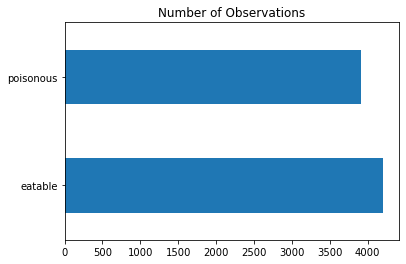

In [32]:
#Graphically looking to the value counts
df["class"].value_counts().plot.barh(title="Number of Observations")

In [33]:
##It is like %50-%50 distribution and # of values are nearly the same for edible and poisonous mushrooms

In [34]:
df["veil-type"].describe().T

count        8124
unique          1
top       partial
freq         8124
Name: veil-type, dtype: object

In [35]:
#Description and informations about the columns
df.describe().T

,count,unique,top,freq
class,8124,2,eatable,4208
cap-shape,8124,6,convex,3656
cap-surface,8124,4,scaly,3244
cap-color,8124,10,brown,2284
bruises,8124,2,no,4748
odor,8124,9,none,3528
gill-attachment,8124,2,free,7914
gill-spacing,8124,2,close,6812
gill-size,8124,2,broad,5612
gill-color,8124,12,buff,1728


In [36]:
##From the description of data, it seems like "veil-type" is same for all mushrooms and there is no variance.
#since it is only 1 variable and no variance, it will not affect our classification problem so we can drop it.

In [37]:
df = df.drop("veil-type", axis=1)

In [38]:
#Checking our data again
df.describe().T

,count,unique,top,freq
class,8124,2,eatable,4208
cap-shape,8124,6,convex,3656
cap-surface,8124,4,scaly,3244
cap-color,8124,10,brown,2284
bruises,8124,2,no,4748
odor,8124,9,none,3528
gill-attachment,8124,2,free,7914
gill-spacing,8124,2,close,6812
gill-size,8124,2,broad,5612
gill-color,8124,12,buff,1728


In [39]:
#take a look at the colors distribution numerically on mushrooms
k = df['gill-color'].value_counts()
print('Number of colors on mushrooms:' + str(k))

Number of colors on mushrooms:buff         1728
pink         1492
white        1202
brown        1048
gray          752
chocolate     732
purple        492
black         408
red            96
yellow         86
orange         64
green          24
Name: gill-color, dtype: int64


In [40]:
#Percentage distributions of colors on mushrooms
v = df['gill-color'].value_counts(normalize=True)
print('Distribution of colors on mushrooms:' +str(v))

Distribution of colors on mushrooms:buff         0.212703
pink         0.183653
white        0.147957
brown        0.129000
gray         0.092565
chocolate    0.090103
purple       0.060561
black        0.050222
red          0.011817
yellow       0.010586
orange       0.007878
green        0.002954
Name: gill-color, dtype: float64


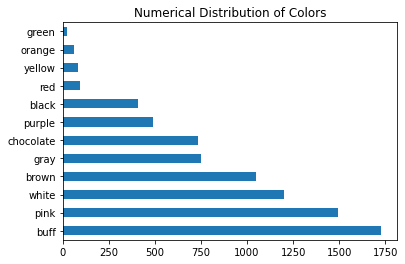

In [41]:
#Visually representation of colors distribution
df['gill-color'].value_counts().plot.barh(title='Numerical Distribution of Colors')

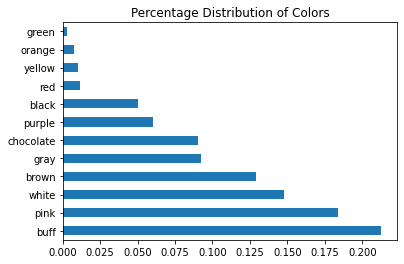

In [42]:
#Visually representation of percentage distribution of colors
df['gill-color'].value_counts(normalize=True).plot.barh(title = 'Percentage Distribution of Colors')

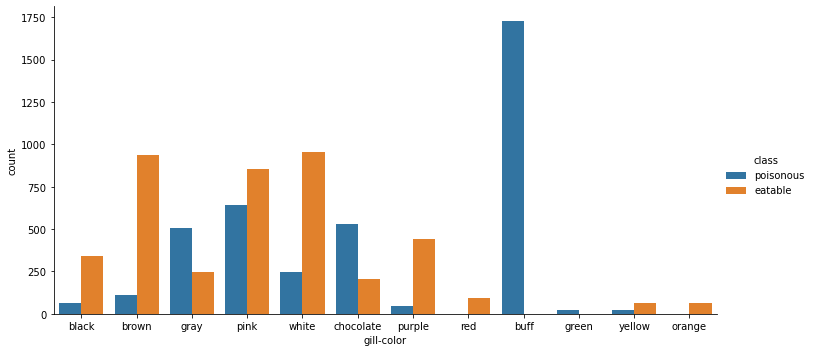

In [43]:
#Now it's time to see visually distribution of colors and their classes on mushrooms
sns.catplot(x='gill-color',hue='class',kind='count',data=df,aspect = 2)

It seems like buff color(b) mushrooms are poisonous while orange(o) and red(e) mushrooms are edible. It gives
us a brief understanding the relation between mushroom color and class of mushroom

In [44]:
#Checking the duplicated entries if there are any. If no, following function will let us know
if len(df[df.duplicated()]) > 0:
    print("Number of duplication : ", len(df[df.duplicated()]))
    print(df[df.duplicated(keep=False)].sort_values(by=list(df.columns)).head())
else:
    print("There is no duplication")

There is no duplication


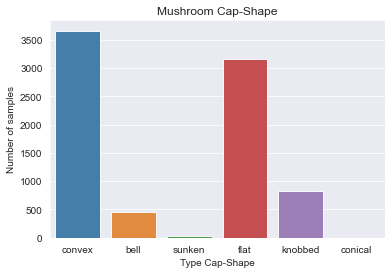

In [45]:
#Visual representation of number of mushrooms with different cap shapes
sns.set_style('darkgrid')
plt.figure()
sns.countplot(df['cap-shape'],alpha =.90)
plt.ylabel('Number of samples')
plt.title('Mushroom' + ' ' + 'cap-shape'.title())
plt.xlabel('Type' + ' ' + 'cap-shape'.title())
plt.show()

Denote that cap shapes meanings are as follows;
cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

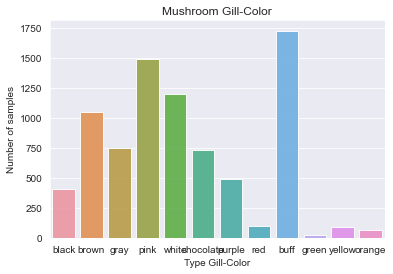

In [46]:
#Again, visual representation of colors of mushrooms
sns.set_style('darkgrid')
plt.figure()
sns.countplot(df['gill-color'],alpha =.90)
plt.ylabel('Number of samples')
plt.title('Mushroom' + ' ' + 'gill-color'.title())
plt.xlabel('Type' + ' ' + 'gill-color'.title())
plt.show()

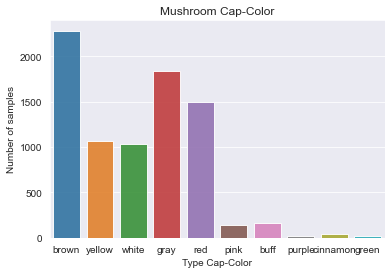

In [47]:
#Visual representation of cap-colors on mushrooms
sns.set_style('darkgrid')
plt.figure()
sns.countplot(df['cap-color'],alpha =.90)
plt.ylabel('Number of samples')
plt.title('Mushroom' + ' ' + 'cap-color'.title())
plt.xlabel('Type' + ' ' + 'cap-color'.title())
plt.show()

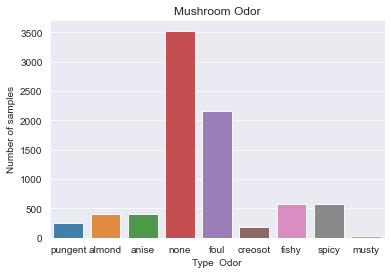

In [48]:
#Visual representation of odor on mushrooms
sns.set_style('darkgrid')
plt.figure()
sns.countplot(df['odor'],alpha =.90)
plt.ylabel('Number of samples')
plt.title('Mushroom' + ' ' + 'odor'.title())
plt.xlabel('Type ' + ' ' + 'odor'.title())
plt.show()

Denote that odor meanings are as follows;
odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s
So we cann see that mostly mushrooms have no smell :)

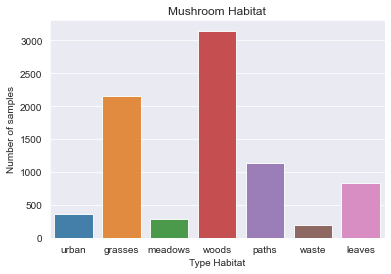

In [49]:
#Visual representation of habitats of mushrooms
sns.set_style('darkgrid')
plt.figure()
sns.countplot(df['habitat'],alpha =.90)
plt.ylabel('Number of samples')
plt.title('Mushroom' + ' ' + 'habitat'.title())
plt.xlabel('Type' + ' ' + 'habitat'.title())
plt.show()

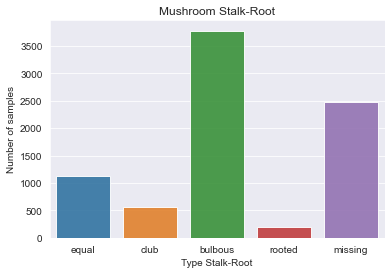

In [50]:
#Visual representation of stalk-root of mushrooms
sns.set_style('darkgrid')
plt.figure()
sns.countplot(df['stalk-root'],alpha =.90)
plt.ylabel('Number of samples')
plt.title('Mushroom' + ' ' + 'stalk-root'.title())
plt.xlabel('Type' + ' ' + 'stalk-root'.title())
plt.show()

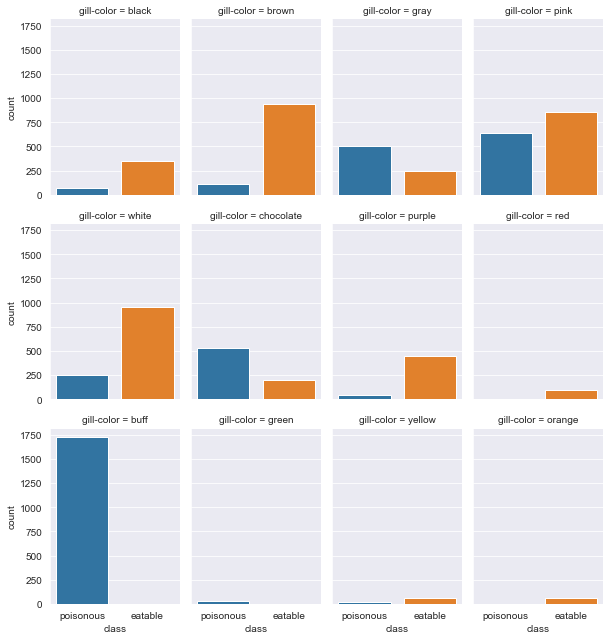

In [51]:
#Let's see visually distributions differentations of colors and mushrooms class whether it is edible or not
sns.catplot('class',col='gill-color',data=df,kind='count',height=3,aspect=.7,col_wrap=4)

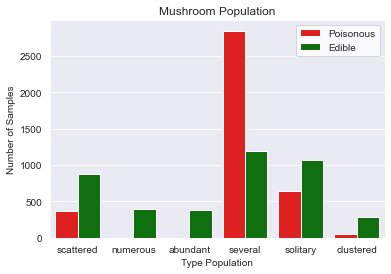

In [52]:
#Visual comparisons of populations and mushrooms class
fig,ax=plt.subplots()
sns.set_style('white')
sns.countplot('population',hue=df['class'],palette=['red','green'],data=df)
plt.ylabel('Number of Samples')
plt.xlabel('Type' + ' ' + 'population'.title())
plt.title('Mushroom' + ' ' + 'population'.title())
plt.legend(title=None,labels=['Poisonous','Edible'])
plt.show()

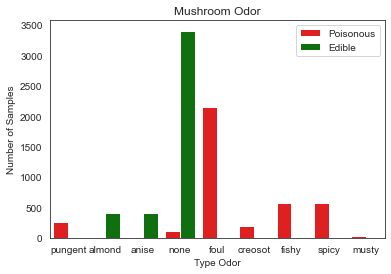

In [53]:
#Visual comparisons of odor and mushrooms class
fig,ax=plt.subplots()
sns.set_style('white')
sns.countplot('odor',hue=df['class'],palette=['red','green'],data=df)
plt.ylabel('Number of Samples')
plt.xlabel('Type' + ' ' + 'odor'.title())
plt.title('Mushroom' + ' ' + 'odor'.title())
plt.legend(title=None,labels=['Poisonous','Edible'])
plt.show()

In [54]:
##MODEL CREATION #
#Now we can start firstly by encoding our categorical variables. First, we will define the target and independent 
#variables.

In [55]:
# 'y' will be our target variables which is the mushroom's class(edible or poisonous)
y=df['class']
# 'X' will include our independent variables and which effects the mushroom's class
X=df.drop('class',axis=1) 
#Take a look at to the head of X 
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,convex,smooth,brown,bruises,pungent,free,close,narrow,black,enlarging,...,smooth,smooth,white,white,white,one,pendant,black,scattered,urban
1,convex,smooth,yellow,bruises,almond,free,close,broad,black,enlarging,...,smooth,smooth,white,white,white,one,pendant,brown,numerous,grasses
2,bell,smooth,white,bruises,anise,free,close,broad,brown,enlarging,...,smooth,smooth,white,white,white,one,pendant,brown,numerous,meadows
3,convex,scaly,white,bruises,pungent,free,close,narrow,brown,enlarging,...,smooth,smooth,white,white,white,one,pendant,black,scattered,urban
4,convex,smooth,gray,no,none,free,crowded,broad,black,tapering,...,smooth,smooth,white,white,white,one,evanescent,brown,abundant,grasses


In [56]:
#Since our Independent Variables are categorical data, we need to encode them
#we are going to use LabelEncoder() from sklearn which we import at first
encd= LabelEncoder() 
for col in X.columns:
    X[col] = encd.fit_transform(X[col])

In [57]:
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,2,3,0,0,7,1,0,1,0,0,...,3,3,7,7,2,1,4,0,3,4
1,2,3,9,0,0,1,0,0,0,0,...,3,3,7,7,2,1,4,1,2,0
2,0,3,8,0,1,1,0,0,1,0,...,3,3,7,7,2,1,4,1,2,2
3,2,2,8,0,7,1,0,1,1,0,...,3,3,7,7,2,1,4,0,3,4
4,2,3,3,1,6,1,1,0,0,1,...,3,3,7,7,2,1,0,1,0,0


In [58]:
#Now, let's encode Y(target) variable 
enc = LabelEncoder()
y= enc.fit_transform(y)

In [59]:
y

array([1, 0, 0, ..., 0, 1, 0])

# We see that 1 will stand for Poisonous and 0 will stand for Edible type of mushrooms.
Now, we need to get the dummy variables for these columns on X. Since they are LabelEncoded, they can
cause a problem. So, it is better to do convert them into the dummy variables.

In [60]:
#Getting dummies for the coefficient variables/columns of X
X=pd.get_dummies(X,columns=X.columns,drop_first=True)
X.head()

,cap-shape_1,cap-shape_2,cap-shape_3,cap-shape_4,cap-shape_5,cap-surface_1,cap-surface_2,cap-surface_3,cap-color_1,cap-color_2,...,population_2,population_3,population_4,population_5,habitat_1,habitat_2,habitat_3,habitat_4,habitat_5,habitat_6
0,0,1,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0
3,0,1,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
4,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


##On getting dummies part, we set the drop_first argument as True because Dummy variables should be -1 smaller than 
the real number of counts. If it is not like that, we will get into the trap and model will fail.

In [61]:
X.corr()

,cap-shape_1,cap-shape_2,cap-shape_3,cap-shape_4,cap-shape_5,cap-surface_1,cap-surface_2,cap-surface_3,cap-color_1,cap-color_2,...,population_2,population_3,population_4,population_5,habitat_1,habitat_2,habitat_3,habitat_4,habitat_5,habitat_6
cap-shape_1,1.000000,-0.020077,-0.017672,-0.007477,-0.001396,0.249631,0.015893,-0.015038,-0.003225,-0.001638,...,-0.005051,-0.009456,-0.022075,-0.011469,0.065707,-0.004286,-0.008985,-0.004835,-0.003453,-0.017653
cap-shape_2,-0.020077,1.000000,-0.720235,-0.304733,-0.056884,-0.020077,-0.019137,-0.040634,-0.020175,-0.012814,...,-0.004586,0.059264,-0.060421,0.044626,-0.096639,-0.004529,-0.029042,0.002845,-0.036493,0.071773
cap-shape_3,-0.017672,-0.720235,1.000000,-0.268226,-0.050070,-0.006285,0.029076,-0.093397,0.019203,-0.003687,...,-0.181191,-0.075804,0.034625,0.111346,-0.052326,-0.129312,0.021891,0.030636,-0.017450,0.074986
cap-shape_4,-0.007477,-0.304733,-0.268226,1.000000,-0.021185,0.010863,0.015261,0.137988,-0.003209,0.041662,...,0.013599,-0.089360,0.172707,-0.170081,0.235108,-0.065047,0.090538,-0.073380,0.119003,-0.089230
cap-shape_5,-0.001396,-0.056884,-0.050070,-0.021185,1.000000,-0.001396,-0.051272,-0.042607,-0.009138,-0.004641,...,-0.014311,-0.026791,0.000341,0.044603,-0.021242,-0.012142,-0.025458,0.288697,-0.009784,-0.050018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
habitat_2,-0.004286,-0.004529,-0.129312,-0.065047,-0.012142,-0.004286,0.039697,0.077081,0.027701,-0.014249,...,0.347262,0.152473,-0.144434,-0.099772,-0.065222,1.000000,-0.078170,-0.042059,-0.030041,-0.153579
habitat_3,-0.008985,-0.029042,0.021891,0.090538,-0.025458,-0.008985,0.117915,-0.039574,-0.058829,0.008698,...,-0.092129,-0.125366,0.169228,0.040714,-0.136749,-0.078170,1.000000,-0.088184,-0.062986,-0.322005
habitat_4,-0.004835,0.002845,0.030636,-0.073380,0.288697,-0.004835,-0.100248,0.117548,0.167996,-0.016074,...,-0.049569,0.130450,0.001180,-0.042888,-0.073577,-0.042059,-0.088184,1.000000,-0.033889,-0.173254
habitat_5,-0.003453,-0.036493,-0.017450,0.119003,-0.009784,-0.003453,0.031986,0.062109,0.250709,-0.011481,...,-0.035405,-0.066282,-0.154742,-0.080392,-0.052553,-0.030041,-0.062986,-0.033889,1.000000,-0.123748


In [62]:
corr_X = X.corr().abs()
mask = np.triu(np.ones_like(corr_X, dtype=bool))
tri_X = corr_X.mask(mask)

tri_X

,cap-shape_1,cap-shape_2,cap-shape_3,cap-shape_4,cap-shape_5,cap-surface_1,cap-surface_2,cap-surface_3,cap-color_1,cap-color_2,...,population_2,population_3,population_4,population_5,habitat_1,habitat_2,habitat_3,habitat_4,habitat_5,habitat_6
cap-shape_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cap-shape_2,0.020077,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cap-shape_3,0.017672,0.720235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cap-shape_4,0.007477,0.304733,0.268226,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cap-shape_5,0.001396,0.056884,0.050070,0.021185,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
habitat_2,0.004286,0.004529,0.129312,0.065047,0.012142,0.004286,0.039697,0.077081,0.027701,0.014249,...,0.347262,0.152473,0.144434,0.099772,0.065222,NaN,NaN,NaN,NaN,NaN
habitat_3,0.008985,0.029042,0.021891,0.090538,0.025458,0.008985,0.117915,0.039574,0.058829,0.008698,...,0.092129,0.125366,0.169228,0.040714,0.136749,0.078170,NaN,NaN,NaN,NaN
habitat_4,0.004835,0.002845,0.030636,0.073380,0.288697,0.004835,0.100248,0.117548,0.167996,0.016074,...,0.049569,0.130450,0.001180,0.042888,0.073577,0.042059,0.088184,NaN,NaN,NaN
habitat_5,0.003453,0.036493,0.017450,0.119003,0.009784,0.003453,0.031986,0.062109,0.250709,0.011481,...,0.035405,0.066282,0.154742,0.080392,0.052553,0.030041,0.062986,0.033889,NaN,NaN


In [63]:
should_we_drop = [c for c in tri_X.columns if any(tri_X[c]> 0.95)]
print(should_we_drop)

['odor_5', 'gill-attachment_1', 'stalk-color-above-ring_2', 'stalk-color-above-ring_4', 'stalk-color-above-ring_8', 'stalk-color-below-ring_2', 'stalk-color-below-ring_4', 'ring-number_1']


We look to the correlation matrix and saw that above columns can be dropped since correlations between them
is more than 0.95, so it can affect the model performance. 
But for a moment we will keep this columns, after looking at the model performance we can decide whether drop or not

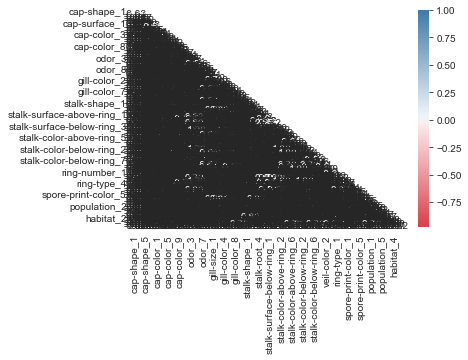

In [64]:
cmap = sns.diverging_palette(h_neg=10,h_pos=240,as_cmap = True)
sns.heatmap(X.corr(), mask=mask, center=0, cmap=cmap, linewidths=5, annot=True, fmt=".2f")

In [65]:
#Now it is time to split our dataset into train and test

In [66]:
#We are going to use 0.7/0.3 split for our train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.30, 
                                                    random_state = 42)

In [67]:
#Take a look at the shape of train and test datasets
print('Shape of X Train Dataset:' + str(X_train.shape))
print('Shape of X Test Dataset:' + str(X_test.shape))
print('Shape of y Train Dataset:' + str(y_train.shape))
print('Shape of y Test Dataset:' + str(y_test.shape))

Shape of X Train Dataset:(5686, 95)
Shape of X Test Dataset:(2438, 95)
Shape of y Train Dataset:(5686,)
Shape of y Test Dataset:(2438,)


Now we need to standardize our train and test data with scikit-learn StandarScaler function. 
1st set the StandardScaler() classifier and then apply them into the X_train and X_test dataset

In [68]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

To reduce dimensionality since we have lots of columns in there, we are going to apply Principal Component Analysis.
We want to extract 2 most important features, so we are going to set number of components in PCA as 2

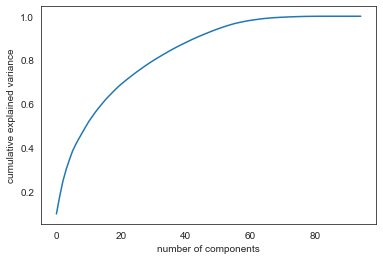

In [69]:
from sklearn.decomposition import PCA
pca = PCA().fit(X_test.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [70]:
print("Variance explained by first 2 component=" , np.cumsum(pca.explained_variance_ratio_ * 100)[2])
print("Variance explained by first 5 component=" , np.cumsum(pca.explained_variance_ratio_ * 100)[5])
print("Variance explained by first 20 component=" , np.cumsum(pca.explained_variance_ratio_ * 100)[20])
print("Variance explained by first 40 component=" , np.cumsum(pca.explained_variance_ratio_ * 100)[40])
print("Variance explained by first 50 component=" , np.cumsum(pca.explained_variance_ratio_ * 100)[50])
print("Variance explained by first 55 component=" , np.cumsum(pca.explained_variance_ratio_ * 100)[55])
print("Variance explained by first 60 component=" , np.cumsum(pca.explained_variance_ratio_ * 100)[60])
print("Variance explained by first 80 component=" , np.cumsum(pca.explained_variance_ratio_ * 100)[80])

Variance explained by first 2 component= 24.640263297370748
Variance explained by first 5 component= 38.479499056288695
Variance explained by first 20 component= 68.97786677269276
Variance explained by first 40 component= 88.04062723482183
Variance explained by first 50 component= 94.29071413138753
Variance explained by first 55 component= 96.64916045649612
Variance explained by first 60 component= 98.13188127085921
Variance explained by first 80 component= 99.983904866725


In [71]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [72]:
X_train.shape

(5686, 2)

In [73]:
X_test.shape

(2438, 2)

In [74]:
#Okey, it seems fair and just like we want.

LOGISTIC REGRESSION MODEL

In [75]:
log_reg = LogisticRegression(solver = "liblinear")
log_reg_model = log_reg.fit(X_train,y_train)
log_reg_model

LogisticRegression(solver='liblinear')

In [76]:
accuracy_score(y_test, log_reg_model.predict(X_test))

0.8921246923707957

In [77]:
cross_val_score(log_reg_model, X_test, y_test, cv = 10)

array([0.88114754, 0.91393443, 0.86065574, 0.88114754, 0.88934426,
       0.88934426, 0.9057377 , 0.92622951, 0.88065844, 0.89300412])

In [78]:
cross_val_score(log_reg_model, X_test, y_test, cv = 10).mean()

0.8921203535046887

NAIVE-BAYESIAN MODEL

In [79]:
from sklearn.naive_bayes import GaussianNB


In [80]:
nb = GaussianNB()
nb_model = nb.fit(X_train, y_train)
nb_model

GaussianNB()

In [81]:
nb_model.predict(X_test)[0:10]

array([0, 1, 1, 0, 1, 1, 0, 1, 0, 0])

In [82]:
nb_model.predict_proba(X_test)[0:10]

array([[9.24030938e-01, 7.59690624e-02],
       [9.08545080e-06, 9.99990915e-01],
       [3.35282238e-08, 9.99999966e-01],
       [9.47980924e-01, 5.20190762e-02],
       [8.88253952e-06, 9.99991117e-01],
       [2.01322044e-07, 9.99999799e-01],
       [5.67136644e-01, 4.32863356e-01],
       [4.69570250e-19, 1.00000000e+00],
       [9.50955542e-01, 4.90444576e-02],
       [9.54693606e-01, 4.53063936e-02]])

In [83]:
y_pred = nb_model.predict(X_test)

In [84]:
accuracy_score(y_test, y_pred)

0.894585726004922

In [85]:
cross_val_score(nb_model, X_test, y_test, cv = 10).mean()

0.8933481751332388

##**KNN MODEL

In [86]:
knn = KNeighborsClassifier()
knn_model = knn.fit(X_train, y_train)
knn_model

KNeighborsClassifier()

In [87]:
y_pred = knn_model.predict(X_test)

In [88]:
accuracy_score(y_test, y_pred)

0.9257588187038556

In [89]:
cross_val_score(knn_model, X_test, y_test, cv = 10).mean()

0.9257555825406463

In [90]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93      1257
           1       0.96      0.89      0.92      1181

    accuracy                           0.93      2438
   macro avg       0.93      0.92      0.93      2438
weighted avg       0.93      0.93      0.93      2438



In [91]:
#Model Tuning on KNN

In [92]:
knn_params = {"n_neighbors": np.arange(1,50)}

In [93]:
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, knn_params, cv=10)
knn_cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [94]:
print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.9386203866432338
Best Parameters: {'n_neighbors': 17}


In [95]:
knn = KNeighborsClassifier(17)
knn_tuned = knn.fit(X_train, y_train)

In [96]:
knn_tuned.score(X_test, y_test)

0.9384741591468416

In [97]:
y_pred = knn_tuned.predict(X_test)

In [98]:
accuracy_score(y_test, y_pred)

0.9384741591468416

In [99]:
cross_val_score(knn_tuned, X_test, y_test, cv = 10).mean()

0.9261603589017069

RANDOM FOREST CLASSIFIER 

In [100]:
from sklearn.ensemble import RandomForestClassifier

In [101]:
rf_model = RandomForestClassifier().fit(X_train, y_train)
rf_model

RandomForestClassifier()

In [102]:
y_pred = rf_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9269893355209188

In [103]:
cross_val_score(rf_model, X_test, y_test, cv = 10).mean()

0.9208240572083923

In [104]:
rf_params = {"max_depth": [2,5,8,10],
            "max_features": [2,5,8],
            "n_estimators": [10,500,1000],
            "min_samples_split": [2,5,10]}

In [105]:
rf_model = RandomForestClassifier()

rf_cv_model = GridSearchCV(rf_model, 
                           rf_params, 
                           cv = 10, 
                           n_jobs = -1, 
                           verbose = 2) 

In [106]:
rf_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   15.9s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:  7.0min finished


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 8, 10], 'max_features': [2, 5, 8],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 500, 1000]},
             verbose=2)

In [107]:
print("Best Parameters: " + str(rf_cv_model.best_params_))

Best Parameters: {'max_depth': 10, 'max_features': 2, 'min_samples_split': 10, 'n_estimators': 1000}


In [108]:
rf_tuned = RandomForestClassifier(max_depth = 10, 
                                  max_features = 2, 
                                  min_samples_split = 10,
                                  n_estimators = 1000)

rf_tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features=2, min_samples_split=10,
                       n_estimators=1000)

In [109]:
y_pred = rf_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.9306808859721083

Gradient Boosting Machines(GBM)

In [110]:
from sklearn.ensemble import GradientBoostingClassifier

In [111]:
gbm_model = GradientBoostingClassifier().fit(X_train, y_train)

In [112]:
y_pred = gbm_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9302707136997539

In [113]:
cross_val_score(gbm_model, X_test, y_test, cv = 10).mean()

0.9228766106726034

In [114]:
gbm_params = {"learning_rate" : [0.001, 0.01, 0.1, 0.05],
             "n_estimators": [100,500,100],
             "max_depth": [3,5,10],
             "min_samples_split": [2,5,10]}

In [115]:
gbm = GradientBoostingClassifier()

gbm_cv = GridSearchCV(gbm, gbm_params, cv = 10, n_jobs = -1, verbose = 2)

In [116]:
gbm_cv.fit(X_train, y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  8.6min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:  9.7min finished


GridSearchCV(cv=10, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.05],
                         'max_depth': [3, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 500, 100]},
             verbose=2)

Wow, it takes like 10 minutes to process and find the best parameters

In [117]:
print("Best Parameters for GBM Model Tuning are: " + str(gbm_cv.best_params_))

Best Parameters for GBM Model Tuning are: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_split': 10, 'n_estimators': 100}


In [118]:
#So lets modify our GBM model tuning with the following best parameters
gbm = GradientBoostingClassifier(learning_rate = 0.1, 
                                 max_depth = 3,
                                min_samples_split = 10,
                                n_estimators = 100)

In [119]:
gbm_tuned =  gbm.fit(X_train,y_train)

In [120]:
#Lets make predictions and look at to the accuracy score
y_pred = gbm_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.9298605414273995

In [121]:
models = [
    knn_tuned,
    log_reg_model,
    nb_model,
    rf_tuned,
    gbm_tuned,
    
]


for model in models:
    names = model.__class__.__name__
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("-"*28)
    print(names + ":" )
    print("Accuracy: {:.4%}".format(accuracy))

----------------------------
KNeighborsClassifier:
Accuracy: 93.8474%
----------------------------
LogisticRegression:
Accuracy: 89.2125%
----------------------------
GaussianNB:
Accuracy: 89.4586%
----------------------------
RandomForestClassifier:
Accuracy: 93.0681%
----------------------------
GradientBoostingClassifier:
Accuracy: 92.9861%


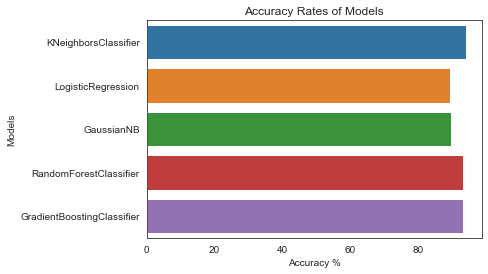

In [122]:
result = []

results = pd.DataFrame(columns= ["Models","Accuracy"])

for model in models:
    names = model.__class__.__name__
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)    
    result = pd.DataFrame([[names, accuracy*100]], columns= ["Models","Accuracy"])
    results = results.append(result)
    
    
sns.barplot(x= 'Accuracy', y = 'Models', data=results)
plt.xlabel('Accuracy %')
plt.title('Accuracy Rates of Models');   

We saw that KNN-KNeighborsClassifier Algorithm is the most accurate algorithm among the other models. So let's 
use that and also print the classification matrix of that.

In [123]:
y_pred = knn_tuned.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      1257
           1       0.97      0.90      0.93      1181

    accuracy                           0.94      2438
   macro avg       0.94      0.94      0.94      2438
weighted avg       0.94      0.94      0.94      2438



From the 4 models that we tried on our dataset, KNN gave the best results. According to the classification report 
accuracy is 0.93

In [124]:
print(confusion_matrix(y_test,y_pred))

[[1228   29]
 [ 121 1060]]


We see that True-Positive is 1228, False-Positive is 29, False-Negative is 121 and True-Negative is 1060.
Classification report already gave us but it is better to remind that calculations 
True-Positive : TP False-Positive : FP False-Negative : FN True-Negative : TN

Precision : TP / TP + FP 
Recall(Also called Sensitivity) : TP / TP + FN 

Our Recall is 0.98, which is quite high. That means we predict most of the Poisonous Mushrooms correctly